In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

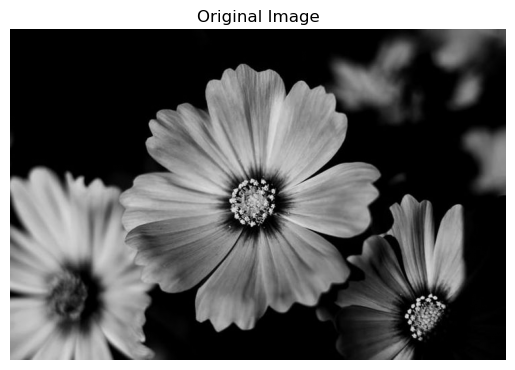

In [2]:
# Loading the image in grayscale
image = cv2.imread('flowers.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

#### Q1: To reduce the number of intensity levels in an image from 256 to 2, in integer powers of 2. The desired number of intensity levels needs to be a variable input to your program.

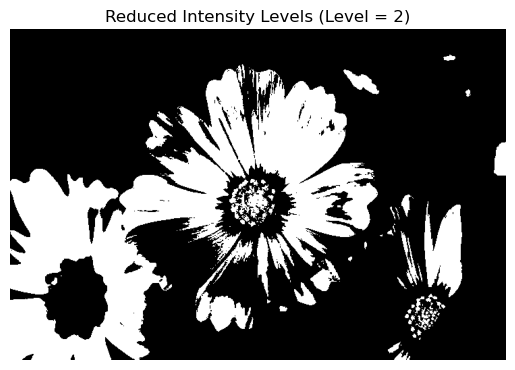

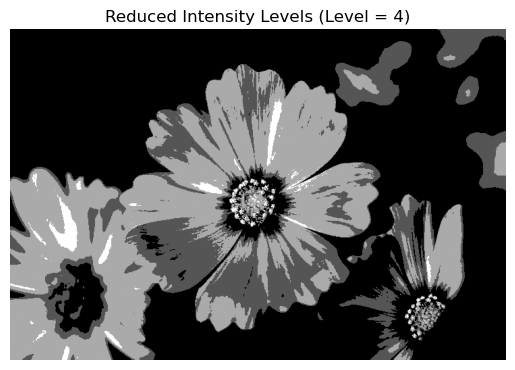

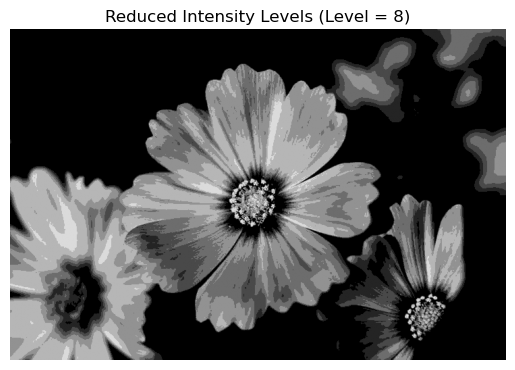

In [3]:
def reduce_intensity_levels(image, levels=2):
    factor = 256 // levels
    reduced = (image // factor) * factor
    return reduced

for level in [2, 4, 8]:
    reduced_img = reduce_intensity_levels(image, level)
    plt.imshow(reduced_img, cmap='gray')
    plt.title(f'Reduced Intensity Levels (Level = {level})')
    plt.axis('off')
    plt.show()

#### Q2: Load an image and then perform a simple spatial 3x3 average of image pixels. Repeat the process for a 10x10 neighborhood and again for a 20x20 neighborhood.

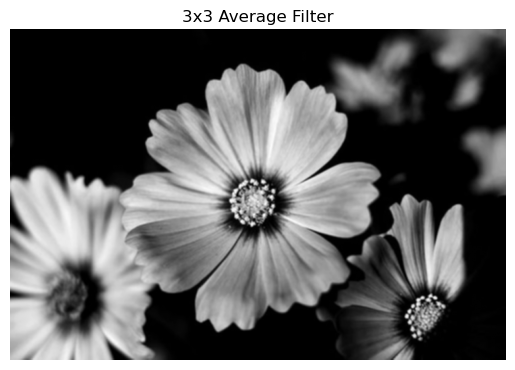

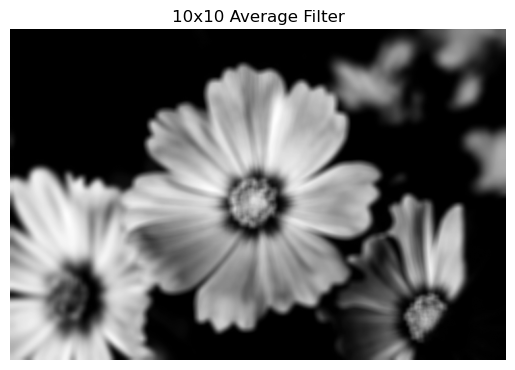

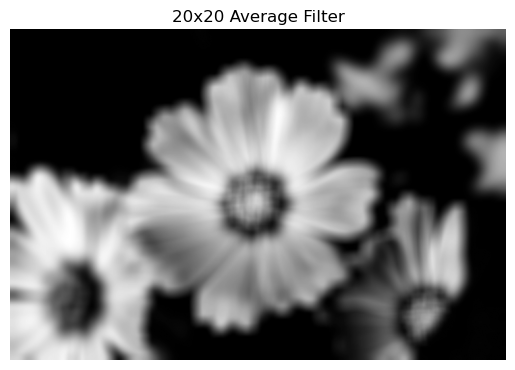

In [4]:
def average_filter(image, kernel_size):
    return cv2.blur(image, (kernel_size, kernel_size))

for size in [3, 10, 20]:
    blurred = average_filter(image, size)
    plt.imshow(blurred, cmap='gray')
    plt.title(f'{size}x{size} Average Filter')
    plt.axis('off')
    plt.show()

#### Q3: Rotate an image by 45 and 90 degrees.

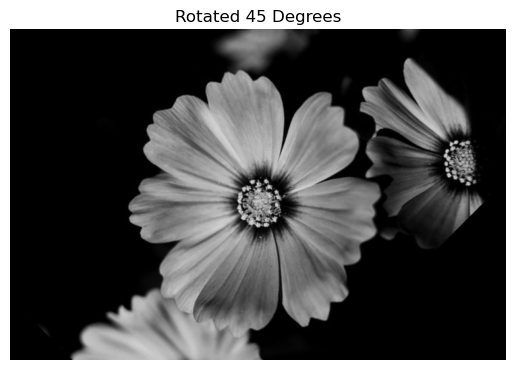

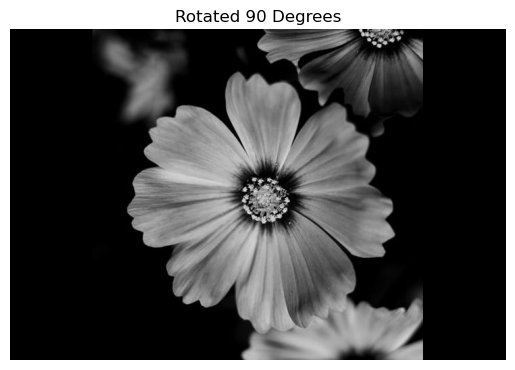

In [5]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, matrix, (w, h))
    return rotated

rotated_45 = rotate_image(image, 45)
rotated_90 = rotate_image(image, 90)

plt.imshow(cv2.cvtColor(rotated_45, cv2.COLOR_BGR2RGB))
plt.title('Rotated 45 Degrees')
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(rotated_90, cv2.COLOR_BGR2RGB))
plt.title('Rotated 90 Degrees')
plt.axis('off')
plt.show()

#### Q4: For every 3×3 block of the image (without overlapping), replace all the corresponding 9 pixels by their average. This operation simulates reducing the image spatial resolution. Repeat this for 5×5 blocks and 7×7 blocks.

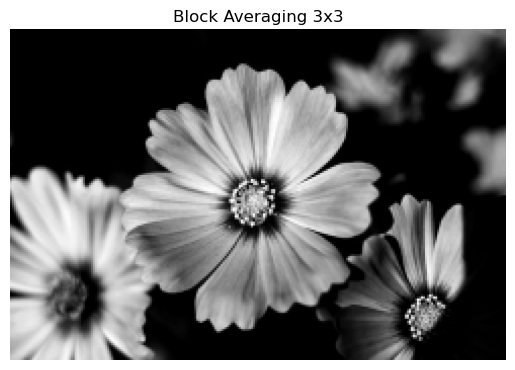

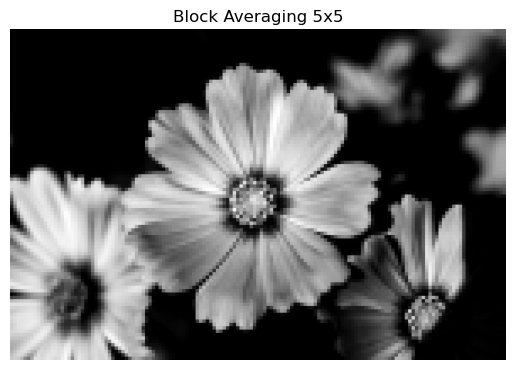

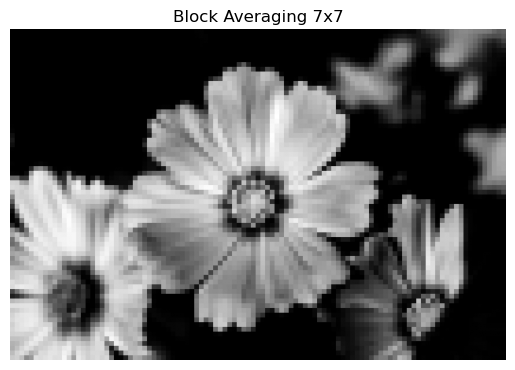

In [6]:
def block_average(image, block_size):
    h, w = image.shape
    img_copy = np.copy(image)

    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            avg = np.mean(block)
            img_copy[i:i+block_size, j:j+block_size] = avg
    
    return img_copy.astype(np.uint8)


for bsize in [3, 5, 7]:
    reduced = block_average(image, bsize)
    plt.imshow(reduced, cmap='gray')
    plt.title(f'Block Averaging {bsize}x{bsize}')
    plt.axis('off')
    plt.show()